## Comparing local oscillators, original vs. HM's implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, runforward

In [2]:
# House keeping cell:

# directory for HCP template connectomes
hcp_dir = './../../data'

# define frequency range of interest
fmin = 2
fmax = 45
fvec = np.linspace(fmin, fmax, 40)

# Initialize Brain object
HCP_brain = Brain.Brain()
HCP_brain.add_connectome(hcp_dir)
HCP_brain.reorder_connectome(HCP_brain.connectome, HCP_brain.distance_matrix)
HCP_brain.bi_symmetric_c()
HCP_brain.reduce_extreme_dir()

In [3]:
default_params = HCP_brain.ntf_params # default parameters for the spectral graph model
print(default_params)

{'tau_e': 0.012, 'tau_i': 0.003, 'alpha': 1.0, 'speed': 5.0, 'gei': 4.0, 'gii': 1.0, 'tauC': 0.006}


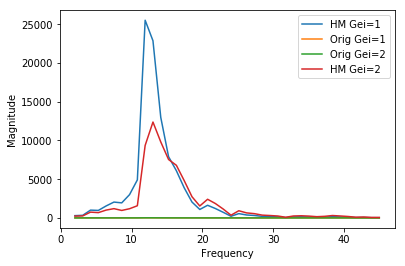

In [20]:
%matplotlib inline
# Plot out the frequency responses:
plt.figure('Frequency Responses')

# changing gei: 
default_params["gei"] = 1
freq_model, frequency_response, evec, Vvec = runforward.run_forward(
HCP_brain, default_params, fvec
)

freq_HM, fr_HM, _, _, Htotal_out = runforward.run_HM_forward(
HCP_brain, default_params, fvec
)
HM_region = freq_HM[0,:]
plt.plot(fvec,np.transpose(np.abs(HM_region)), label = 'HM Gei=1')
plot_region = freq_model[0,:]
plt.plot(fvec,np.transpose(np.abs(plot_region)),label = 'Orig Gei=1');

default_params["gei"] = 2
freq_model, frequency_response, evec, Vvec = runforward.run_forward(
HCP_brain, default_params, fvec
)
freq_HM, fr_HM, _, _, Htotal_out = runforward.run_HM_forward(
HCP_brain, default_params, fvec
)
HM_region = freq_HM[0,:]
plot_region = freq_model[0,:]
plt.plot(fvec,np.transpose(np.abs(plot_region)), label = 'Orig Gei=2');
plt.plot(fvec,np.transpose(np.abs(HM_region)), label = 'HM Gei=2')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.gca().legend(loc = 'upper right')

In [22]:
freq_model.shape

(86, 40)

In [23]:
frequency_response.shape

(40, 86)